# <font color='blue'> PPHA 30546 Machine Learning | PS4</font> 

Kathy Zhang, Yimeng Wu

In [72]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_decomposition import PLSRegression
# import sklearn.neighbors._base
# sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sympy import symbols, Eq, solve, exp

from IPython.display import Image
from IPython.core.display import HTML 

from itertools import combinations

import warnings
warnings.filterwarnings('ignore')

###  CH6 Q9
#### Question 9, parts (a), (b), (e)-(g)

#### 9. In this exercise, we will predict the number of applications received using the other variables in the College data set.

• For (a), please use a 50/50 training/test split. To avoid confusion among partners and facilitate grading, please also set random_state=37 when you split the data. Also, be sure to standardize the data (before performing PCR and PLS) using scikit-learn’s StandardScaler command. You should scale after splitting your data.

• For (e) and (f), be sure to use 10-fold cross-validation (10FCV) on the training set, shuffle the data randomly for splitting, and set random_state=1. Report the test error obtained, along with the value of M selected by cross-validation, both by minimizing the appropriate cross-validated error and using the “elbow method.”

• Python does not have a PCR command, so you should use scikit-learn’s PCA command, then run an OLS regression using the resulting principal components.

• Scikit-learn does have a PLS regression command (PLSRegression).

#### (a) Split the data set into a training set and a test set.

In [73]:
# Load the bike dataset
college = pd.read_csv('Data-College.csv')
college.drop(['Unnamed: 0'], axis=1, inplace=True)
display(college.head())
display(college.shape)


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


(777, 18)

In [74]:
# Check for NA values
na_count = pd.DataFrame(np.sum(college.isna(), axis = 0),
                        columns = ["Count NAs"])
print(na_count)

             Count NAs
Private              0
Apps                 0
Accept               0
Enroll               0
Top10perc            0
Top25perc            0
F.Undergrad          0
P.Undergrad          0
Outstate             0
Room.Board           0
Books                0
Personal             0
PhD                  0
Terminal             0
S.F.Ratio            0
perc.alumni          0
Expend               0
Grad.Rate            0


In [75]:
# Convert dummy variable
college['Private'] = np.where(college['Private'] == 'Yes', 1, 0)

In [76]:
# Separate X and y
X = college.drop(['Apps'], axis = 1)
y = college['Apps']

# Do a 70-30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 37)

In [77]:
# Scale the data
scalar = StandardScaler() 
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train) 
X_test_scaled = scalar.transform(X_test)


#### (b) Fit a linear model using least squares on the training set, and report the test error obtained.

<font color='blue'> The test error is 1222954.04. Using normalized and un-normalized X gives similar/the same test error.

In [78]:
# Using normalized data
ols = LinearRegression().fit(X_train_scaled, y_train)
# Examine coefficient estimates
print('Coefficients:', ols.coef_)
print('Intercept:', ols.intercept_)

Coefficients: [-2.53922367e+02  2.91030585e+03 -1.51074813e+02  9.98914364e+02
 -3.39571840e+02  3.71997160e+02  2.26000248e+01 -2.19476642e+02
  1.72898253e+02 -1.48588450e+01 -2.51155785e+00 -2.45047861e+02
  7.20200596e+00  1.33570383e+02 -9.47865430e+01  4.93784048e+02
  2.14708258e+02]
Intercept: 2926.832474226804


In [79]:
# Get test error
y_pred_train = ols.predict(X_train_scaled)
mse_train_ols = mean_squared_error(y_train, y_pred_train)
print("OLS-Train MSE, normalized: ", round(mse_train_ols,2))

y_pred_test = ols.predict(X_test_scaled)
mse_test_ols = mean_squared_error(y_test, y_pred_test)
print("OLS-Test MSE, normalized: ", round(mse_test_ols, 2))

OLS-Train MSE, normalized:  1150245.72
OLS-Test MSE, normalized:  1222954.04


In [80]:
# Using unnormalized data
ols = LinearRegression().fit(X_train, y_train)
# Examine coefficient estimates
print('Coefficients:', ols.coef_)
print('Intercept:', ols.intercept_)

# Get test error
y_pred_train = ols.predict(X_train)
mse_train_ols = mean_squared_error(y_train, y_pred_train)
print("OLS-Train MSE, unnormalized: ", round(mse_train_ols,2))

y_pred_test = ols.predict(X_test)
mse_test_ols = mean_squared_error(y_test, y_pred_test)
print("OLS-Test MSE, unnormalized: ", round(mse_test_ols, 2))

Coefficients: [-5.84414047e+02  1.24005231e+00 -1.60371647e-01  5.63665950e+01
 -1.72932278e+01  7.50792569e-02  1.40747825e-02 -5.33789319e-02
  1.59825916e-01 -1.12482768e-01 -3.62959020e-03 -1.56742785e+01
  5.13690163e-01  3.53458972e+01 -7.50720463e+00  9.78988381e-02
  1.23187499e+01]
Intercept: -881.351783262935
OLS-Train MSE, unnormalized:  1150245.72
OLS-Test MSE, unnormalized:  1222954.04


#### (e) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

In [81]:
# Storing the MSEs
train_error = {}

# Perform PCR for all possible number of principal components
for m in range(1, len(X_train.columns)+1):
    pcr = make_pipeline(
        StandardScaler(), # First Transformer - scale the data
        PCA(n_components=m), # Second Transformer - PCA to find M number of principal components
        LinearRegression()
    ).fit(X_train, y_train)

    train_error[m] = np.mean(-1 *cross_val_score(
        pcr, X_train_scaled, y_train, cv=KFold(n_splits=10,
                                               random_state=1,
                                               shuffle=True), scoring='neg_mean_squared_error'))

Text(0.5, 1.0, 'Principal Component Regression')

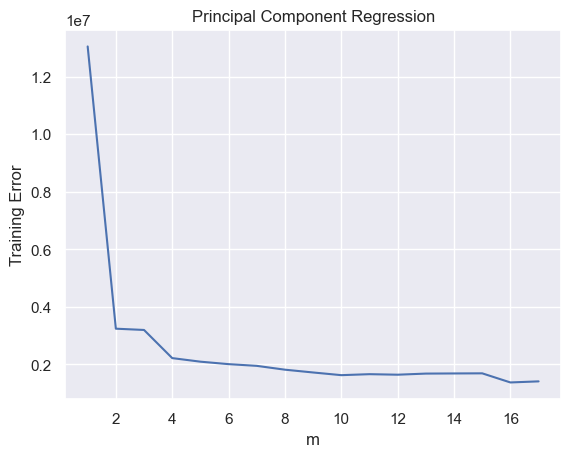

In [82]:
# Visualize the results:
# graph train_error by m number of principle component features

plt.figure(facecolor='white')
plt.plot(list(train_error.keys()), list(train_error.values()))
plt.xlabel('m')
plt.ylabel('Training Error')
plt.title('Principal Component Regression')

### Elbow method

In [83]:
# Get test error
# Choose 4 as the elbow and optimal number of M
pcr = make_pipeline(PCA(n_components=4), LinearRegression())
# Fit the PCR pipeline on the training data
pcr.fit(X_train_scaled, y_train)
# Assess the fit using the test data
y_predict = pcr.predict(X_test_scaled)
# Obtain the test error
test_mse = mean_squared_error(y_test, y_predict)
print("Test MSE for PCR: ", test_mse)

Test MSE for PCR:  3460816.154371423


### Error minimization method

In [1]:
min_key = min(train_error, key=train_error.get)
min_key

NameError: name 'train_error' is not defined

In [84]:
# PCR: Get test error with a higher m
# Choose 4 as the elbow and optimal number of M
pcr = make_pipeline(PCA(n_components=17), LinearRegression())
# Fit the PCR pipeline on the training data
pcr.fit(X_train_scaled, y_train)
# Assess the fit using the test data
y_predict = pcr.predict(X_test_scaled)
# Obtain the test error
test_mse = mean_squared_error(y_test, y_predict)
print("Test MSE for PCR: ", test_mse)

Test MSE for PCR:  1222954.0382534442


#### (f) Fit a PLS model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

In [85]:
# Storing the MSEs
train_error2 = {}

# Perform PCR for all possible number of principal components
for m in range(1, len(X_train.columns)+1):
    pls = PLSRegression(n_components=m, scale=True).fit(X_train, y_train)
    
    train_error2[m] = np.mean(-1*cross_val_score(
        pls, X_train_scaled, y_train, cv=KFold(n_splits=10,
                                               random_state=1,
                                               shuffle=True), scoring='neg_mean_squared_error'))

Text(0.5, 1.0, 'Partial Least Squares')

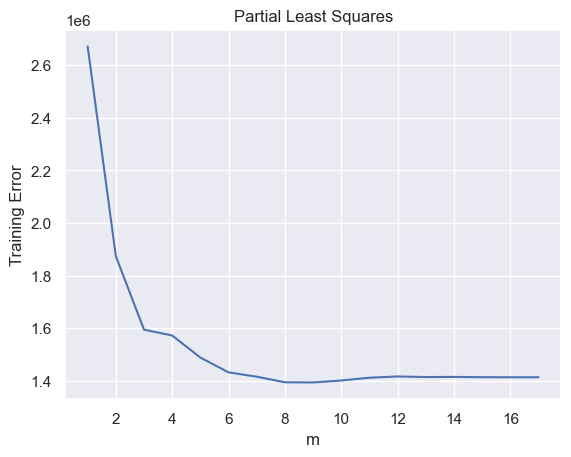

In [86]:
# Visualize the results
plt.figure(facecolor='white')
plt.plot(list(train_error2.keys()), list(train_error2.values()))
plt.xlabel('m')
plt.ylabel('Training Error')
plt.title('Partial Least Squares')

### Elbow method

In [87]:
# Get test error
# Fit and predict a regression model using three transformed features
pls = PLSRegression(
        n_components=3,
        scale=True
    ).fit(X_train, y_train)

y_predict = pls.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_predict)
print("Test MSE for PLS: ", test_mse)

Test MSE for PLS:  35986271.01730349


### Error minimization method

In [88]:
min_key = min(train_error2, key=train_error2.get)
min_key

9

In [90]:
# PLS: Get test error with a higher m
# Fit and predict a regression model using three transformed features
pls = PLSRegression(
        n_components=12,
        scale=True
    ).fit(X_train, y_train)

y_predict = pls.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_predict)
print("Test MSE for PLS: ", test_mse)

Test MSE for PLS:  29360052.57707484


#### (g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

<font color='blue'> By comparing test MSE, using elbow method, OLS gives the lowest test MSE of 1222954.04 since it it basically using the maximum m in a PCR. Using error minimization, both OLS and PCR perform the best.

**Test MSE**: 

**OLS**

1222954.04


**PCR**

Elbow when m = 4: 3460816.154371423

Error minimization when m = 17: 1222954.0382534442


**PLS**

Elbow when m = 3: 35986271.01730349

Error minimization when m = 12:  29360052.57707484


Using elbow technique for PCR and PLS without the goal of simply minimizing test MSE, OLS tends to excel in simplicity and interpretability when the predictors are not collinear, making it a generally preferred choice under such circumstances. PCR performs slightly better with m = 4 than PLS with m = 3. Using error minimization method, as discussed, OLS still gives the best result, and PCR gives the same result as OLS since it is the same as OLS when m = 17. Test error does not reduce as much for PLS when we use a higher m. 


The considerable discrepancy in test MSE among the OLS and the rest suggests that OLS notably outperforms PCR and PLS for this prediction, given the selected m since we use the elbow technique. The absence of error reduction with PCR and PLS may hint at the predominance of bias over variance as the source of model error. However, the selection of a model should be informed by the tradeoffs and the context of the data and prediction task at hand. We need to recognize the potential for overfitting with OLS, especially when dealing with numerous variables that exhibit high multicollinearity. PCR offers a viable solution to enhance model stability under such conditions by leveraging principal components that encapsulate the majority of variance in the predictors, potentially leading to improved generalization on new data. Employing the elbow technique, we prioritized lower dimensionality and multicollinearity over minimizing MSE. Despite this, both PCR (with m=4) and PLS (with m=3) yielded substantially higher MSEs (3460816.154371423 and 35986271.01730349 respectively), indicating a lack of enhanced predictability or accuracy compared to OLS. This could imply that these dimensionality reduction methods did not capture sufficient variance crucial for predicting the response variable. PCR can improve the stability of the model when dealing with multicollinearity by considering only the principal components that explain most of the variance, which may also lead to better generalization on new data. The tradeoff is that by reducing the number of components, some information is lost, which might increase the bias of the model. PLS is similar to PCR but tries to find components that not only explain the variance in the predictors but also have high covariance with the response variable. It is particularly useful when the predictors are highly collinear or when there are more predictors than observations. PLS can lead to models that are more robust and better at prediction, at the cost of potentially increased model complexity and decreased interpretability compared to PCR.

###  CH8 Q4
#### 4. This question relates to the plots in Figure 8.14.
#### FIGURE 8.14. Left: A partition of the predictor space corresponding to Exercise 4a. Right: A tree corresponding to Exercise 4b.
#### (a) Sketch the tree corresponding to the partition of the predictor space illustrated in the left-hand panel of Figure 8.14. The numbers inside the boxes indicate the mean of Y within each region.

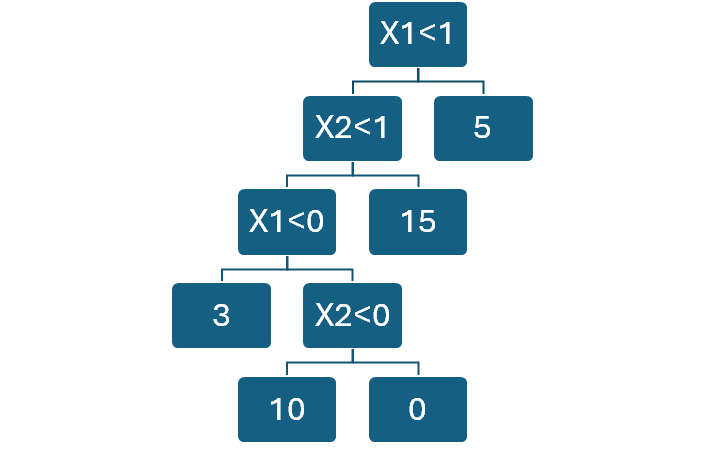

In [18]:
Image("CH8 4a.png")

#### (b) Create a diagram similar to the left-hand panel of Figure 8.14, using the tree illustrated in the right-hand panel of the same figure. You should divide up the predictor space into the correct regions, and indicate the mean for each region.

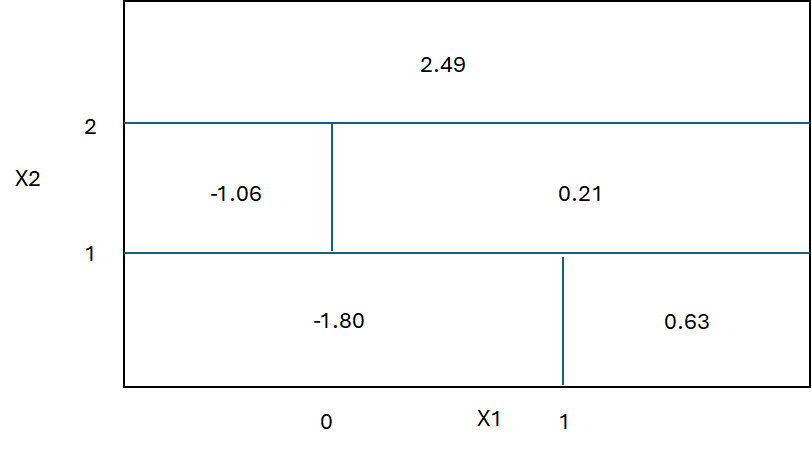

In [19]:
Image("CH8 4b.png")

###  CH8 Q9
#### 9. This problem involves the OJ data set which is part of the ISLP package.

2For variable definitions, see https://rdrr.io/cran/ISLR/man/OJ.html.

3Note that there are some redundant predictors in the dataset. You can ignore this complication and use the full dataset for prediction.

4There are two ways to plot a tree in Python: scikit-learn’s plot_tree() function and Graphviz. The latter is a little difficult to work with, so use the former. The scikit-learn export_tree() function can also be useful if you want to produce a text summary of the fitted tree, but you’re not required to do so for this assignment.

5This is the ccp_alpha argument in scikit-learn’s DecisionTreeClassifier().

6Use the training dataset for 5FCV, shuffle the data randomly for splitting, and set random_state=13.

7Note that tree size is the number of terminal nodes or leaves and you can find this using the .get_n_leaves() method after fitting the model.

#### i. Create a training set and a test set. Please use a 70/30 training/test split and set random_state=3 when you split the data

In [20]:
oj = pd.read_csv('Data-OJ.csv')
display(oj.head())
print(oj.shape)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


(1070, 18)


In [21]:
# Convert dummy variable
# oj['Purchase'] = np.where(oj['Purchase'] == 'CH', 1, 0)
oj['Store7'] = np.where(oj['Store7'] == 'Yes', 1, 0)

In [22]:
oj.dtypes

Purchase           object
WeekofPurchase      int64
StoreID             int64
PriceCH           float64
PriceMM           float64
DiscCH            float64
DiscMM            float64
SpecialCH           int64
SpecialMM           int64
LoyalCH           float64
SalePriceMM       float64
SalePriceCH       float64
PriceDiff         float64
Store7              int32
PctDiscMM         float64
PctDiscCH         float64
ListPriceDiff     float64
STORE               int64
dtype: object

In [23]:
# Separate X and y
X = oj.drop(['Purchase'], axis = 1)
y = oj['Purchase']

# Do a 70-30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 3)

#### ii. Fit a full, unpruned tree to the training data, with Purchase as the response and the other variables as predictors. Set random_state=2 when calling the DecisionTreeClassifier() function. What is the training error rate?

Training Accuracy: 0.9933244325767691
Training Error: 0.006675567423230944
Test Accuracy: 0.7601246105919003
Training Error: 0.23987538940809972


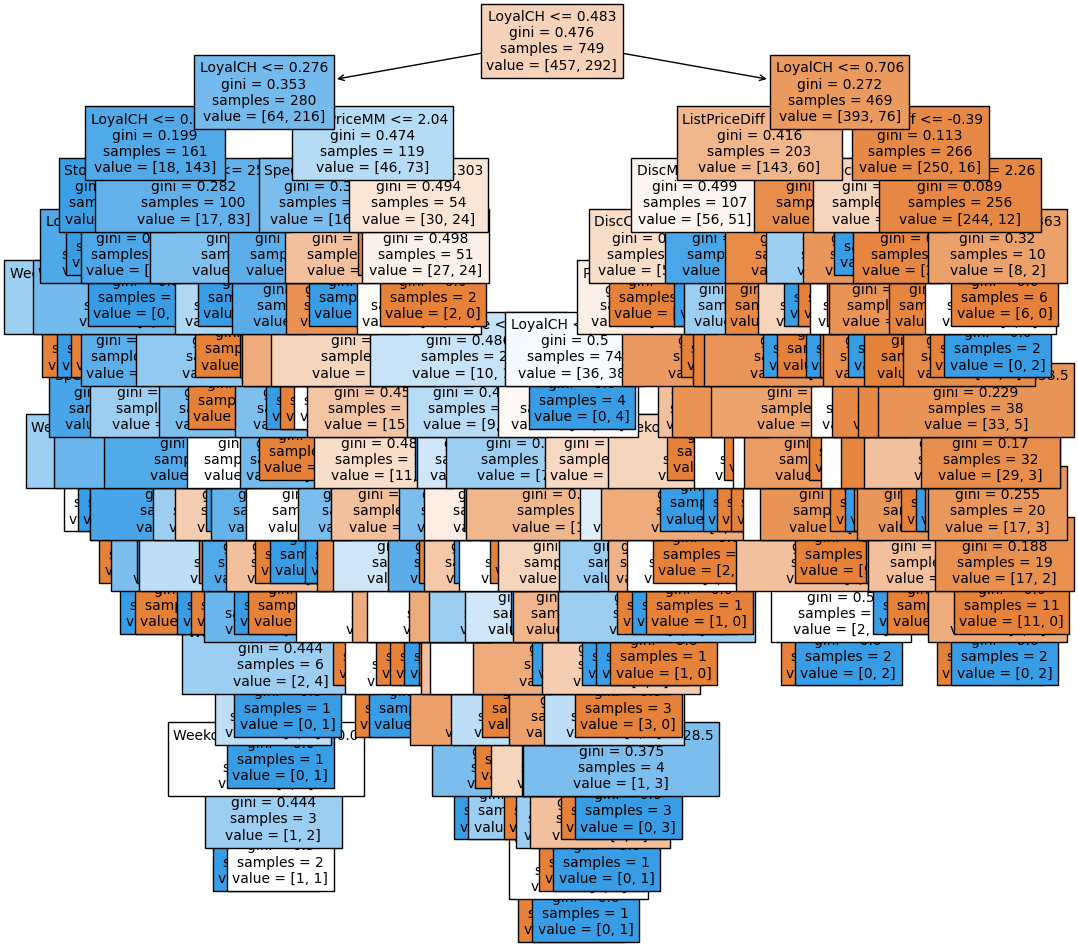

In [24]:
# No stopping criterion
full_model = DecisionTreeClassifier(
    random_state=2,
    criterion='gini')
full_model.fit(X_train, y_train)

print(f'Training Accuracy: {full_model.score(X_train, y_train)}')
print(f'Training Error: {1-full_model.score(X_train, y_train)}')
print(f'Test Accuracy: {full_model.score(X_test, y_test)}')
print(f'Training Error: {1-full_model.score(X_test, y_test)}')

plt.figure(figsize=(12,12), facecolor='white')
tree.plot_tree(full_model, fontsize=10, feature_names=X_train.columns.tolist(), filled=True)
plt.show()

#### iii. Create a plot of the full, unpruned tree from the previous question.4 The plot is a mess, isn’t it? For the purposes of this question, fit another tree with the max_depth parameter set to 3 in order to get an interpretable plot. How many terminal nodes does the tree have? Interpret the information displayed in the first of the terminal nodes on your plot.


<font color='blue'> The tree has 8 terminal nodes. The first terminal node indicates, 

<font color='blue'> gini = 0.032, samples = 61, value = [1, 60], class = MM


- <font color='blue'> We reach this node if we satisfy first three conditions: LoyalCH <= 0.276, LoyalCH <= 0.051, and LoyalCH <= 0.051.

- <font color='blue'> There are 61 samples in this node, being classified as 'MM', and Value = [1, 60] indicates that there is 1 sample of class 'CH' and 60 samples of class 'MM' in this node.

- <font color='blue'> The gini index evaluates the quality of a particular split, measuring how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. A gini index of 0 would mean the node is pure, containing samples of only one class. This node has a gini index of 0.032, which is quite low, indicating that the samples in this node are mostly from the same class.



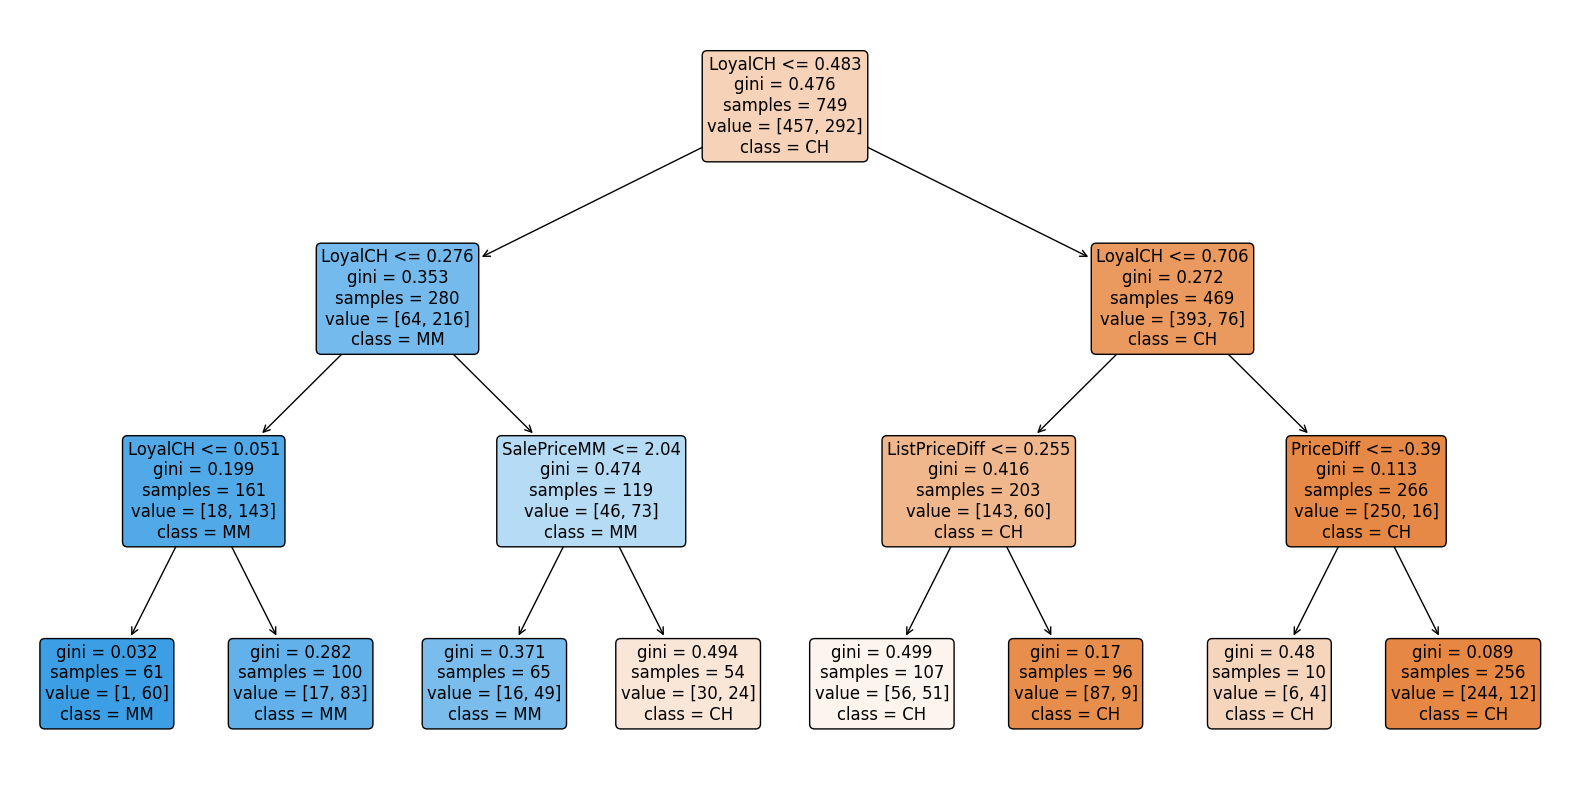

8

In [25]:
# Fitting a decision tree with max_depth set to 3 for interpretability
tree_depth3 = DecisionTreeClassifier(max_depth=3, random_state=2)
tree_depth3.fit(X_train, y_train)

# Plotting the tree
plt.figure(figsize=(20,10))
plot_tree(tree_depth3, filled=True, feature_names=X.columns, class_names=['CH', 'MM'], rounded=True)
plt.show()

# Counting the number of terminal nodes
terminal_nodes = tree_depth3.get_n_leaves()
terminal_nodes

#### iv. Use your fit of the full, unpruned tree to predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?
(e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?


<font color='blue'>  This matrix indicates that there were 159 TPs, 85 TNs, 39 FPs, and 39 FNs. The test error rate is approximately 24%, indicating the proportion of incorrect predictions on the test data.

Training Error Rate: 0.006675567423230944
Test Error Rate: 0.23987538940809972


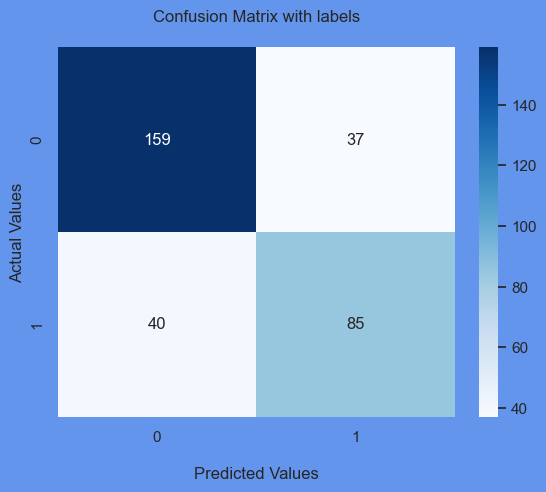

In [26]:
y_hat_test = full_model.predict(X_test)
y_hat_train = full_model.predict(X_train)
cm = confusion_matrix(y_test, y_hat_test)

sns.set(rc={'figure.facecolor': 'cornflowerblue'})
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')
ax.set_title('Confusion Matrix with labels\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

print("Training Error Rate:", 1-accuracy_score(y_train, y_hat_train))
print("Test Error Rate:", 1-accuracy_score(y_test, y_hat_test))

Text(47.25, 0.5, 'Actual Values')

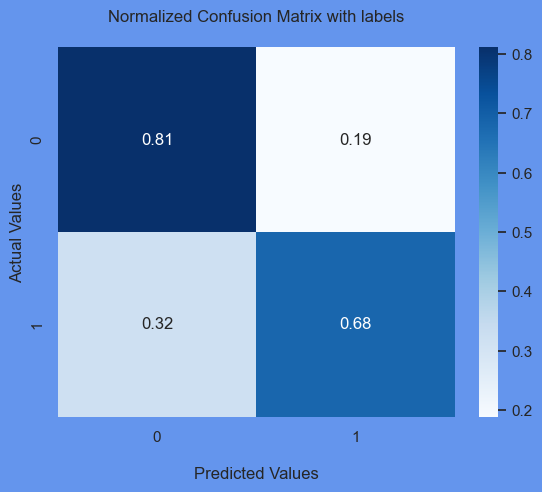

In [27]:
cm_norm = confusion_matrix(y_test, y_hat_test, normalize='true')

sns.set(rc={'figure.facecolor': 'cornflowerblue'})
ax = sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues')
ax.set_title('Normalized Confusion Matrix with labels\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

#### v. Use cost complexity pruning to determine the optimal subtree for prediction by tuning the the a hyperparameter.5Produce a plot with the values of a (ccp_alpha) on the x-axis and the cross-validated classification error rate on the y-axis calculated using 5-fold cross-validation (5FCV). Which a corresponds to the lowest cross-validated classification error rate?
5This is the ccp_alpha argument in scikit-learn’s DecisionTreeClassifier().

6Use the training dataset for 5FCV, shuffle the data randomly for splitting, and set random_state=13.

<font color='blue'> Alpha = 0.01379269302194669 corresponds to the the lowest cross-validated classification error rate of 0.19222371364653257.

In [28]:
# use the .cost_complexity_pruning_path() function to fit various values of α to the training data
path = full_model.cost_complexity_pruning_path(X_train, y_train)
# get list of ccp_alpha values created for experimentation
ccp_alphas = path.ccp_alphas
#  save these values in a dictionary
parameters = {'ccp_alpha': ccp_alphas}

# Use GridSearchCV to iterate over the CCP alphas... 
kf = KFold(n_splits=5, random_state = 13, shuffle=True)
cv_tree = GridSearchCV(full_model, parameters, cv = kf, scoring='accuracy')
cv_tree.fit(X_train, y_train)
# ... and save the corresponding CV error for each alpha level
cv_scores = []
for mean_score in cv_tree.cv_results_["mean_test_score"]:
    # create list of error rates produced by each corresponding ccp_alpha 
    # (errors are saved in the same order as their alpha values appear in the ccp_alpha list)
    cv_scores.append(1-mean_score)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


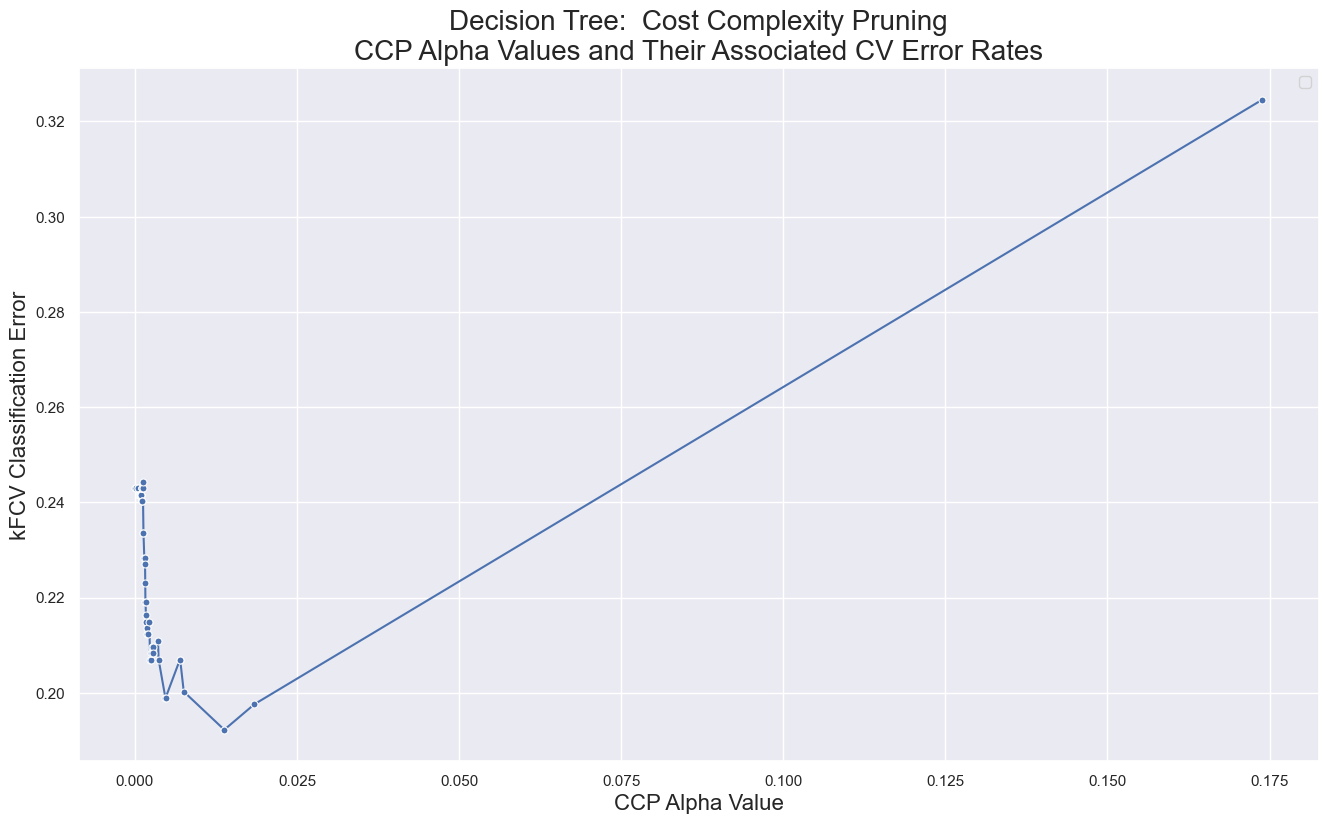

In [29]:
# Plot the error rate as a function of alpha
fig, ax = plt.subplots(figsize=(16,9), facecolor='white')
sns.lineplot(x=ccp_alphas, y=cv_scores, marker='o', markersize=5, ax=ax)
ax.set_ylabel("kFCV Classification Error", fontsize=16)
ax.set_xlabel("CCP Alpha Value", fontsize=16)
ax.set_title('Decision Tree:  Cost Complexity Pruning'
             '\nCCP Alpha Values and Their Associated CV Error Rates',
             fontsize=20)
plt.legend()
plt.show()

In [30]:
# determine the alpha value where the minimum cv error occured
min_error = min(cv_scores)
idx = np.where(cv_scores == min_error)[0][0]
alpha_at_min_error = ccp_alphas[idx]

print(f"The lowest classification error rate is {min_error}."
      f"\nThe alpha that corresponds to this value is {alpha_at_min_error}")

The lowest classification error rate is 0.19222371364653257.
The alpha that corresponds to this value is 0.01379269302194669


#### vi. Now produce a second plot showing the tree size on the x-axis and the crossvalidated classification error rate (that you calculated in the method in the previous question) on the y-axis.7 Which tree size corresponds to the lowest cross-validated classification error rate?Briefly explain why the value of a affects the tree size and the classification error rate.

7Note that tree size is the number of terminal nodes or leaves and you can find this using the .get_n_leaves() method after fitting the model.

<font color='blue'> The tree size that corresponds to the lowesr cross-validated classification error rate is 4.

<font color='blue'> The cost complexity Pruning parameter ccp_alpha in decision trees is used to prune the tree and avoid overfitting. It controls the complexity of the tree by penalizing the addition of more nodes to the tree, thereby influencing the size of the tree and its classification error rate. When ccp_alpha is set to a higher value, it imposes a higher cost for adding new nodes to the tree. This means that during the pruning process, nodes that contribute a small amount to the overall accuracy of the tree are more likely to be pruned away, leading to a smaller tree. Conversely, a lower ccp_alpha value means that the tree can grow more complex with more terminal nodes because the cost of adding new nodes is lower.

<font color='blue'> At very low values of ccp_alpha, the tree is allowed to grow complex and can overfit the training data, leading to a low error rate on the training data but potentially high error on test data. As ccp_alpha increases, the tree is pruned more aggressively, which can reduce overfitting and lead to a lower classification error rate on unseen data, up to a certain point. However, if ccp_alpha is increased too much, the tree becomes too simple and may underfit the data, leading to an increase in the classification error rate again.

<font color='blue'> By finding the lowest classification error rate as the question asked, we tend to get a lower value of ccp_alpha. Though the correspondng low tree size seems counterintuitive since lower alpha gives more complex model, strong predictors and high pruning sensitivity might have give us such a result of tree size = 4.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


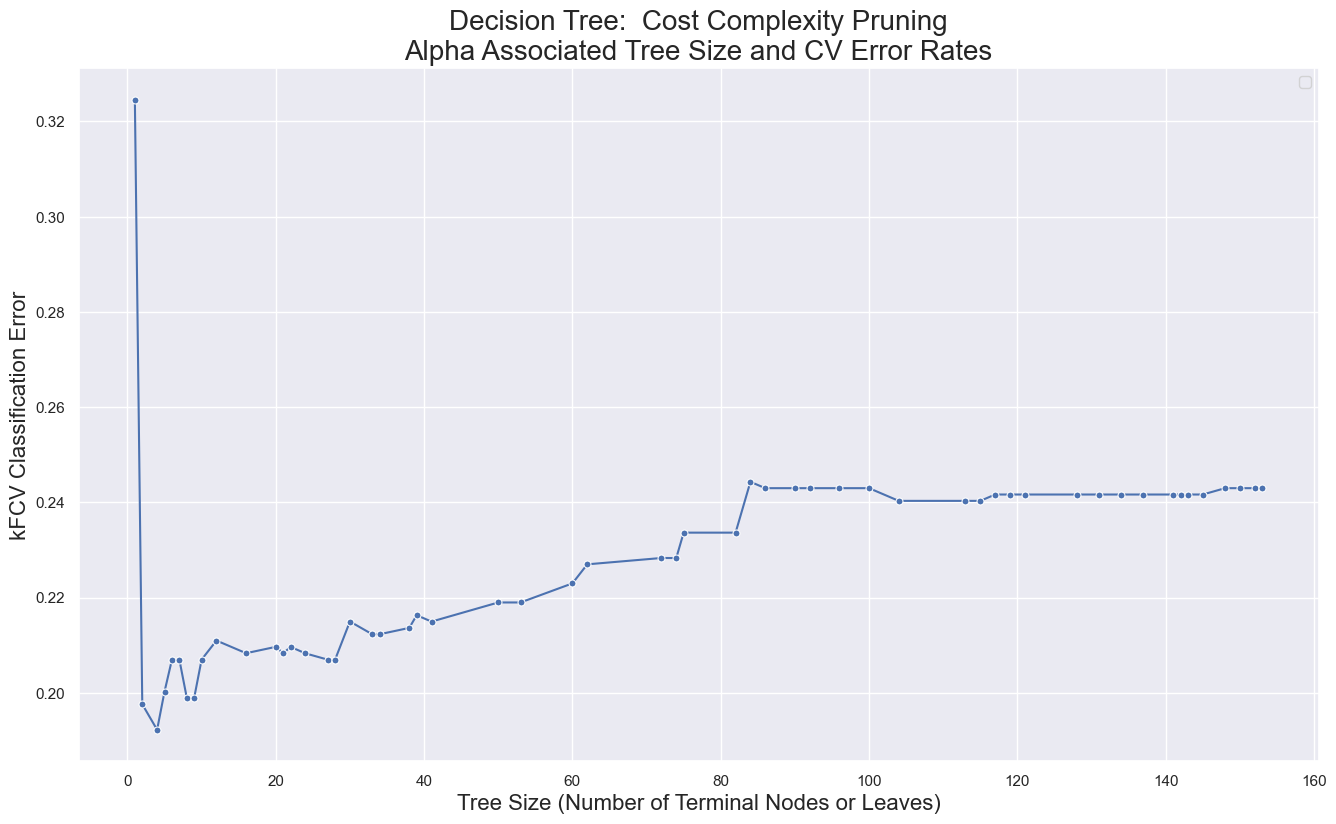

In [31]:
# Plot the tree size as a function of alpha
tree_size = []
for a in ccp_alphas:
    clf_a = DecisionTreeClassifier(ccp_alpha=a, random_state=2, criterion='gini')
    clf_a.fit(X_train, y_train)
    tree_size.append(clf_a.get_n_leaves())

fig, ax = plt.subplots(figsize=(16,9), facecolor='white')

sns.lineplot(x=tree_size, y=cv_scores, marker='o', markersize=5, ax=ax)
ax.set_ylabel("kFCV Classification Error", fontsize=16)
ax.set_xlabel("Tree Size (Number of Terminal Nodes or Leaves)", fontsize=16)
ax.set_title('Decision Tree:  Cost Complexity Pruning'
             '\nAlpha Associated Tree Size and CV Error Rates',
             fontsize=20)
plt.legend()
plt.show()

In [32]:
# determine the alpha value where the minimum cv error occured
min_error = min(cv_scores)
idx = np.where(cv_scores == min_error)[0][0]
alpha_at_min_error = ccp_alphas[idx]
# and get the size of the tree at this alpha value
size_at_min_error = tree_size[idx]

print(f"The lowest classification error rate is {min_error}."
      f"\nThe alpha that corresponds to this value is {alpha_at_min_error}"
      f"\nThe tree size that corresponds to this value is {size_at_min_error}")

The lowest classification error rate is 0.19222371364653257.
The alpha that corresponds to this value is 0.01379269302194669
The tree size that corresponds to this value is 4


#### vii. Produce a plot of the optimal pruned subtree obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

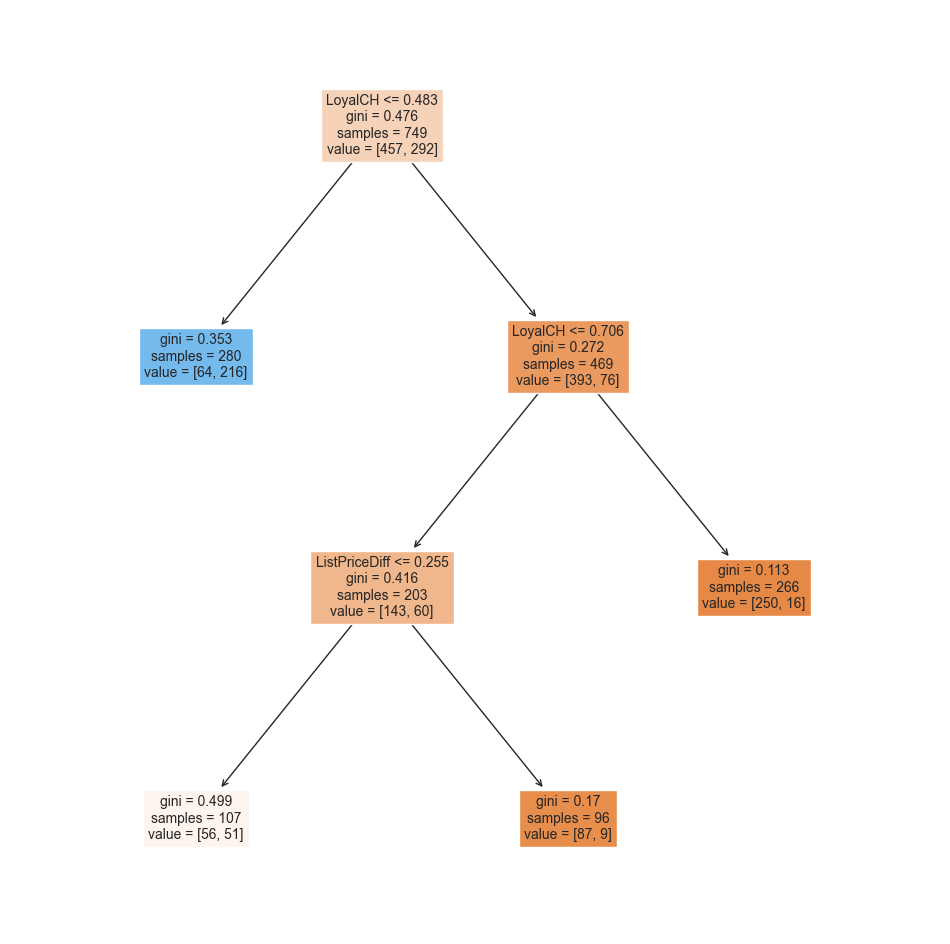

Training Error: 0.1869158878504673
Test Error: 0.19937694704049846


DecisionTreeClassifier(ccp_alpha=0.01379269302194669, random_state=2)

In [33]:
# Fit the pruned tree using the optimal level of alpha obtained
pruned_model = DecisionTreeClassifier(ccp_alpha=alpha_at_min_error, random_state=2, 
                                     criterion='gini').fit(X_train, y_train)

#show a visual display of the tree
plt.figure(figsize=(12,12), facecolor='white')
tree.plot_tree(pruned_model, fontsize=10, feature_names=X_train.columns.tolist(), filled=True)
plt.show()

# make predictions on the test set using the optimal, pruned tree model
print(f'Training Error: {1 - pruned_model.score(X_train, y_train)}')
print(f'Test Error: {1 - pruned_model.score(X_test, y_test)}')

pruned_model

#### viii. Compare the training error rates between the pruned and unpruned trees. Which is higher? Briefly explain.

<font color='blue'> 

| |Training Error |Test Error|
|-------------|-------------|-------------|
 Pruned |  0.1869158878504673 | 0.19937694704049846|
|Unpruned | 0.006675567423230944 | 0.23987538940809972|

The training error rate for the unpruned tree of 0.67% is significantly lower than for the pruned tree of 18.69%. This is expected because an unpruned tree is more complex and can fit the training data more closely, leading to a lower error on the training set. However, this close fit to the training data can result in overfitting, where the model captures noise in the training data that does not generalize well to unseen data.

#### ix. Compare the test error rates between the pruned and unpruned trees. Which is higher? Briefly explain.

<font color='blue'> 

| |Training Error |Test Error|
|-------------|-------------|-------------|
 Pruned |  0.1869158878504673 | 0.19937694704049846|
|Unpruned | 0.006675567423230944 | 0.23987538940809972|


The test error rate for the pruned tree of 19.94% is lower than for the unpruned tree of 23.99%. This indicates that the pruned tree, despite having a higher error on the training set, generalizes better to test data. The pruning process removes branches of the tree that contribute little to prediction accuracy but capture noise in the training data, thereby reducing the model's complexity and making it more robust to variations in new data. This exemplifies the trade-off between bias and variance, where reducing variance through pruning and simplification can lead to better model performance on test data, even if it slightly increases the bias as seen in the training error.